# Taller de OpenCV 3.3.0 con Python 3
# Elementos básicos de OpenCV
## Daniel Mejía Raigosa
### danielmejia55@gmail.com
#### Diciembre 14, 2017

# Daniel Mejía Raigosa

### https://github.com/Daniel-M/Workshop_OpenCV

* https://daniel-m.github.io/
* https://github.com/Daniel-M
* https://bitbucket.org/Daniel-M

# Sumario

* Introducción
* Instalación de OpenCV
* Conceptos previos
* Lectura y escritura de imágenes
* Operaciones básicas de OpenCV
* Funciones de dibujo
* Operaciones avanzadas
* Captura de video y procesamiento *en vivo*
* Clasificadores Primeros pasos hacia Machine Learning

# Introducción: Por qué OpenCV?

## OpenCV

* Librería de funciones dirigidas a procesamiento de imágenes
* Especializada a procesamiento en vivo
* Larga historia de desarrollo (2000)
* Amplia comunidad y excelente documentación
* Inclusión de módulos para machine learning (ml)

# Instalación de OpenCV

## Linux

### Vía PIP
```
pip3 install --upgrade numpy jupyter matplotlib opencv-python
```

### Vía Conda
```
conda install numpy jupyter matplotlib opencv-python
```

## Windows

## Vía Conda
```
conda install numpy jupyter matplotlib opencv-python
```

## Mac
```
www.google.com
```

## Verificando la instalación

Se ejecuta la línea de código

```
python3 -c "import cv2"
```

La cual no debe arrojar error alguno

## Ayudante de sesión: Roger

![Otter](images/otter.jpg)

# Conceptos previos

* Las imagenes en OpenCV son matrices de la forma $(N \times M) \times C$ donde $N \times M$ es el tamaño de la imagen y $C$ es el número de canales
* Una imagen de 400x600 en RGB correspondería al arreglo $(400 \times 600) \times 3$
* La estructura de datos que representa imagenes en OpenCV son arreglos de numpy `numpy.array`
* Los métodos válidos para arreglos numpy lo son para imágenes OpenCV
* OpenCV 3.3.0 se importa como `import cv2`
* Se recomienda también importar numpy como `import numpy as np`

## Leer una imagen

La función de lectura de imágenes en OpenCV es `imread`, mediante la llamada `cv2.imread(ruta_a_imagen,modo_de_lectura)`, El modo de lectura es cualquiera de los siguientes (el número en paréntesis es la forma corta de introducir la opción),

* `cv2.IMREAD_COLOR`(1) : Abre la imagen a color, despreciando cualquier transparencia. Este es el modo por defecto, y los canales de la imagen se leen en orden BGR (Blue-Green-Red).  
* `cv2.IMREAD_GRAYSCALE`(0) : Abre la imagen en modo *escala de grises*.  
* `cv2.IMREAD_UNCHANGED`(-1) : Abre la imagen tal cual es, incluyendo transparencias.  

In [1]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('images/otter.jpg',cv2.IMREAD_COLOR)

img.shape

(423, 640, 3)

## Visualizar una imagen

### Con Matplotlib

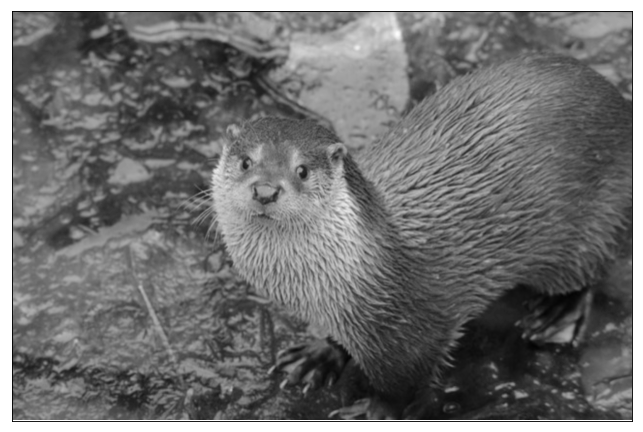

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/otter.jpg',0)

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Con OpenCV

In [3]:
import numpy as np
import cv2

img = cv2.imread('images/otter.jpg',0)
cv2.imshow('Roger',img)
k = cv2.waitKey(0) & 0xFF #
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('q'):
    cv2.destroyAllWindows()

## Visor OpenCV
![VisorOpenCV](images/ocview.png.jpg) 

## Escribir una imagen

El método de escritura de imágenes es `cv2.imwrite(ruta_destino,imagen)`, de modo que el código,

```
cv2.imwrite('images/otter_gray.png',img)
```

guarda la imagen `img` en la ruta `images/otter_gray.png`

# Operaciones básicas con imágenes

## Aritmética

* Las imagenes, al ser tratadas como arreglos numpy pueden ser sumadas, restadas, etc, siendo válidas expresiones como,

```
resultado = imagen1 + imagen2
```

```
resultado = imagen1 - imagen2
```

```
resultado = 2*imagen1
```

Además de soportar *slicing* para elegir una porción de una imágen

```
resultado = resultado[a:b,c:d]
```

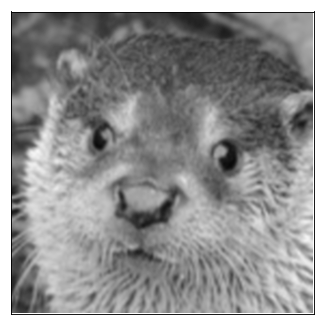

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/otter.jpg',0)

# Picking a ROI of 140x140 with top left corner at 100,200
img = img[100:240, 200:340]

plt.figure(figsize=(5, 5), dpi=80) # Resize the figure
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Transformación de espacios de color

* OpenCV lee las imágenes con orden BGR en sus canales, por esta razón al visualizarla puede parecer *extraña*
* Puede interesarnos modificar el espacio de color de las imágenes para poder procesarlas o exagerar características en ellas.
* Esto se puede lograr mediante el método `cv2.cvtColor(imagen,transformación)` donde `transformación` es cualquiera de una amplia [lista de 204 opciones](https://docs.opencv.org/3.3.0/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0) de transformaciones posibles entre diferentes espacios de color.

Veamos algunos ejemplos,
 


In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/otter.jpg',1)

# Changing from BGR to RGB Colorspace
imgg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imghsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV_FULL)
imgyuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

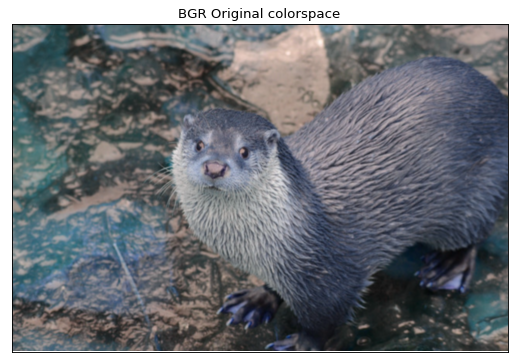

In [6]:
plt.figure(figsize=(8, 6), dpi=80) # Resize the figure
plt.title("BGR Original colorspace")
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

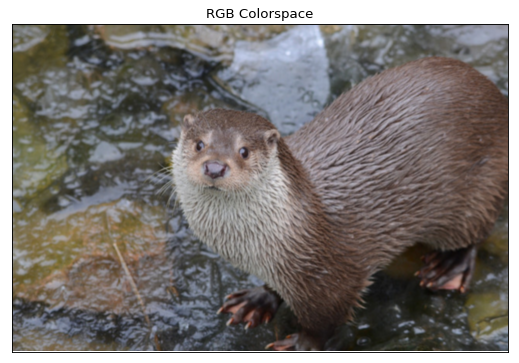

In [7]:
plt.figure(figsize=(8, 6), dpi=80) # Resize the figure
plt.title("RGB Colorspace")
plt.imshow(imgrgb, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

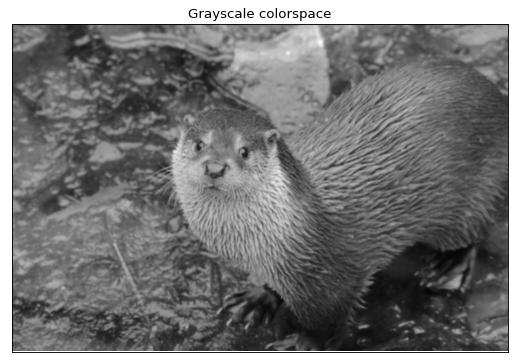

In [8]:
plt.figure(figsize=(8, 6), dpi=80) # Resize the figure
plt.title("Grayscale colorspace")
plt.imshow(imgg, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

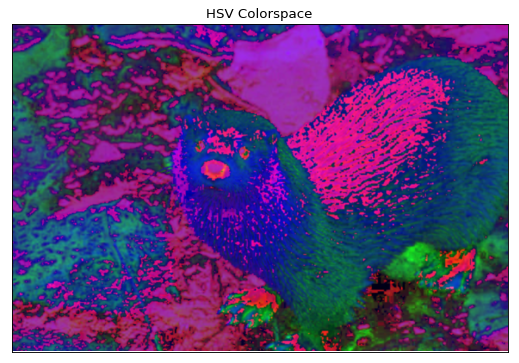

In [9]:
plt.figure(figsize=(8, 6), dpi=80) # Resize the figure
plt.title("HSV Colorspace")
plt.imshow(imghsv, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

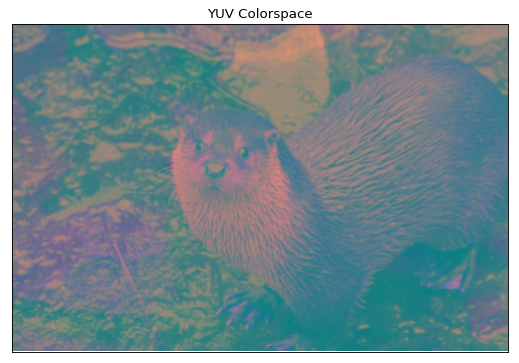

In [10]:
plt.figure(figsize=(8, 6), dpi=80) # Resize the figure
plt.title("YUV Colorspace")
plt.imshow(imgyuv, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Blending

Algunas veces queremos mezclar dos imágenes $A$ y $B$, como si existiese alguna transparencia, mediante la operación,

$$
P = \alpha A + \beta B + \gamma
$$

Esto se logra mediante la función `cv2.addWeighted(A,alpha,B,beta,gamma)`

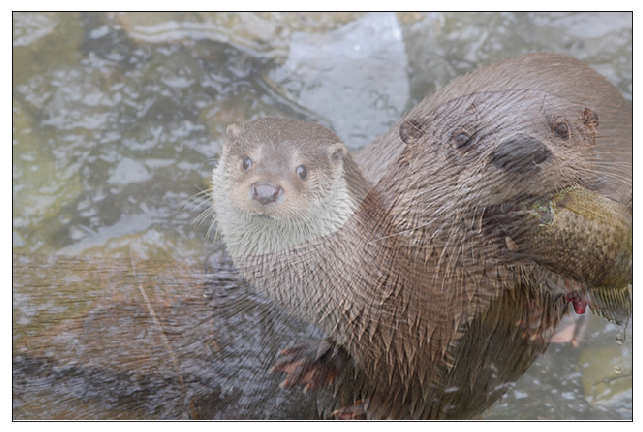

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

roger = cv2.imread('images/otter.jpg',1)
otter = cv2.imread('images/otter1.jpg',1)

otter = otter[0:423,100:740]

result = cv2.addWeighted(roger,0.60,otter,0.5,0.0)
#result = cv2.addWeighted(roger,0.60,0.0,0.5,0.0)
#result = 0.7*roger + 5*otter
result = result.astype('uint8')

result = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(result)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [12]:
roger.dtype

dtype('uint8')

# Funciones de Dibujo

In [13]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

## Línea

In [14]:
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

## Rectángulo

In [15]:
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

## Círculo

In [16]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

## Elipse

In [17]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

## Contornos

In [18]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

In [19]:
img = cv2.drawContours(img,[np.array([[10,10],[100,320],[500,10]])],-1,(255,0,255),2)

## Texto

In [20]:
font = cv2.FONT_HERSHEY_SIMPLEX

tx = cv2.putText(img,'Roger',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

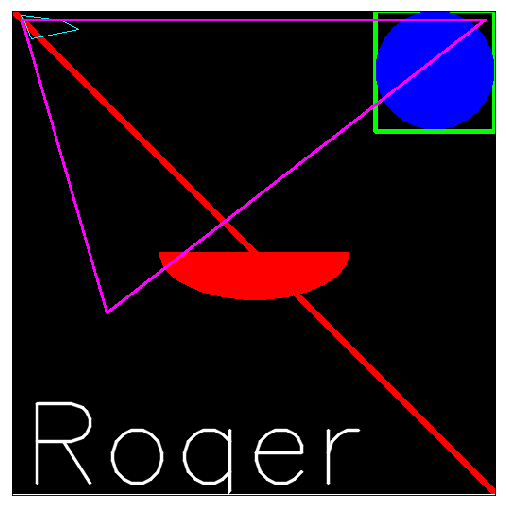

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# Operaciones avanzadas sobre imágenes

## Umbrales

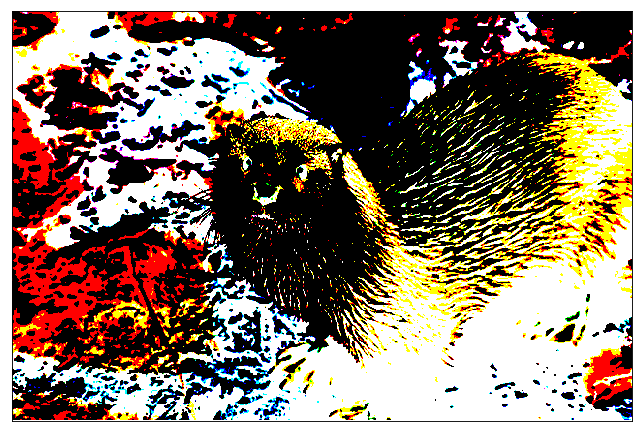

In [22]:
import numpy as np
import cv2

thr = 90

roger = cv2.imread('images/otter.jpg',1)

ret,imgth = cv2.threshold(roger,thr,255,cv2.THRESH_BINARY_INV)
#ret,imgth = cv2.threshold(roger,thr,255,cv2.THRESH_TRUNC)

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(imgth)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Rangos

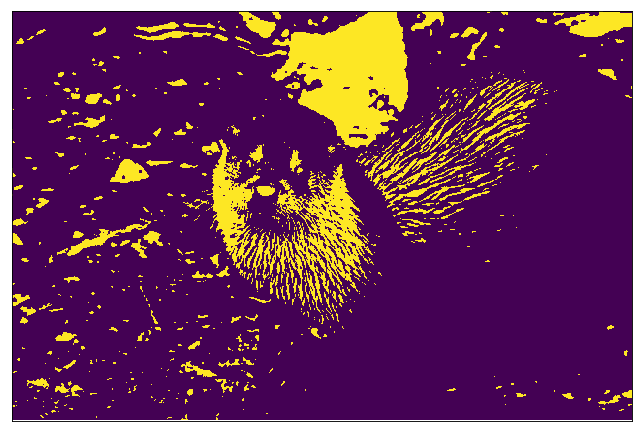

In [23]:
import numpy as np
import cv2

roger = cv2.imread('images/otter.jpg',1)
# define range 
lower = np.array([150,10,0])
upper = np.array([255,255,255])

# Threshold the image
mask = cv2.inRange(roger, lower, upper)

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(mask)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Difuminado

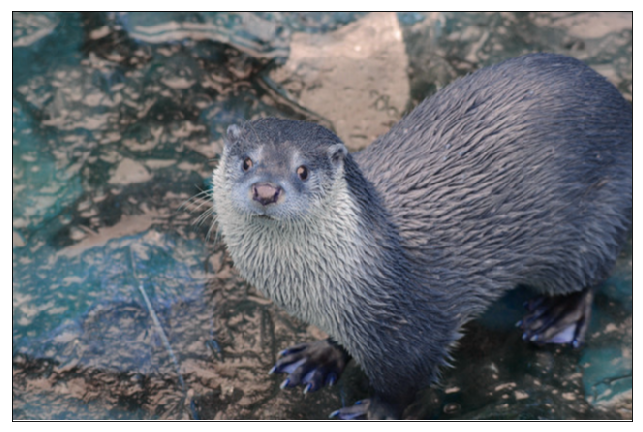

In [24]:
import numpy as np
import cv2

roger = cv2.imread('images/otter.jpg',1)

blur = cv2.blur(roger,(2,2))

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(blur)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Laplaciano

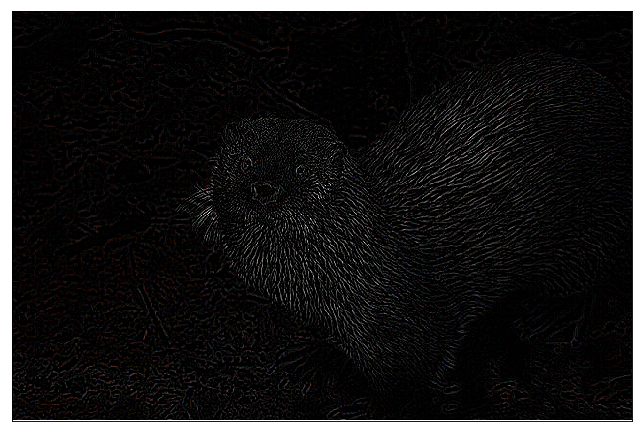

In [25]:
import numpy as np
import cv2

roger = cv2.imread('images/otter.jpg',1)

laplacian = cv2.Laplacian(roger,0)

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(laplacian)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Aplicación: agudizado

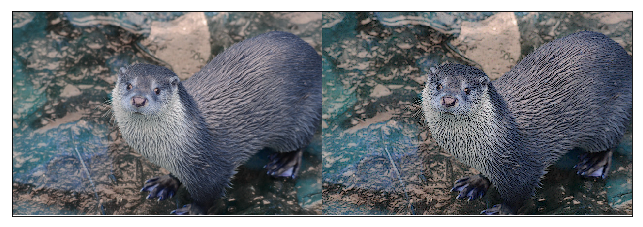

In [26]:
import numpy as np
import cv2

roger = cv2.imread('images/otter.jpg',1)

# Sharpening image
# taking laplacian
laplacian = cv2.Laplacian(roger,0)
# taking image - 2*laplacian
sharp = cv2.addWeighted(roger,1.0,laplacian,-1.0,0)

res = np.hstack((roger,sharp))

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(res)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Histograma

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/otter.jpg',0)

hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

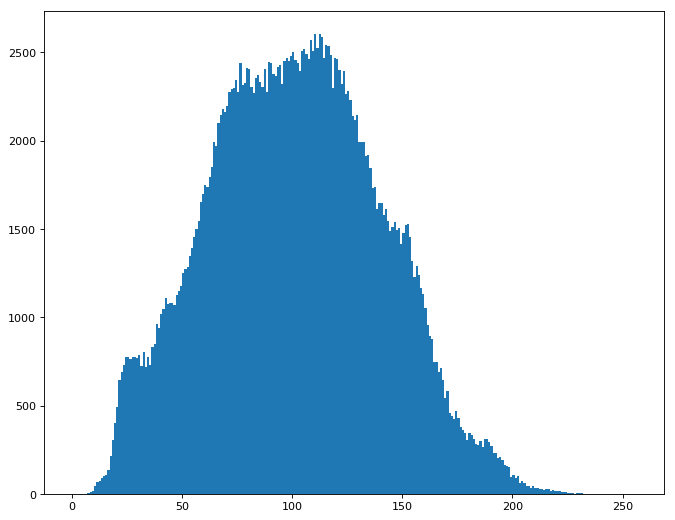

In [28]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.hist(img.ravel(),256,[0,256]);
plt.show()

In [29]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

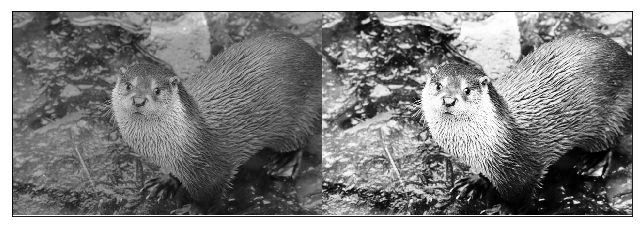

In [30]:
plt.figure(figsize=(10, 8), dpi=80) # Resize the figure
plt.imshow(res, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

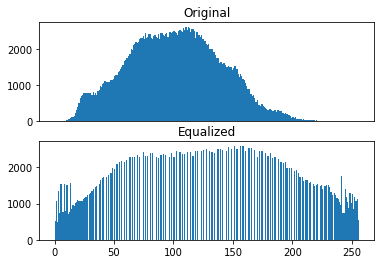

In [31]:
plt.subplot(211)
plt.title("Original")
plt.xticks([])
plt.hist(img.ravel(),256,[0,256])

plt.subplot(212)
plt.title("Equalized")
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.hist(equ.ravel(),256,[0,256]) 

plt.show()

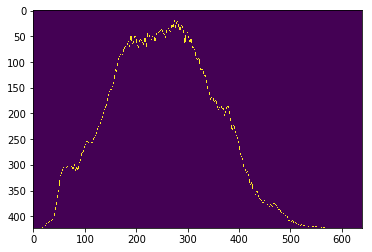

In [32]:
imghist = np.zeros(img.shape,'uint8')

hist = cv2.calcHist([img],[0],None,[256],[0,256])
minn,maxx,posminn,posmaxx = cv2.minMaxLoc(hist)

sy,sx = imghist.shape

for i in range(0,len(hist)-1):
    p1 = (int(i*(sx/len(hist))),sy-int((hist[i]/maxx)*(sy-20)))
    p2 = (int((i+1)*(sx/len(hist))),sy-int((hist[i+1]/maxx)*(sy-20)))
    cv2.line(imghist,p1,p2,color=(255,255,255),thickness=1)

plt.imshow(imghist)
plt.show()

# Captura de video y procesamiento *en vivo*

## Próxima sessión: entrenando un clasificador por cascada